In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.lines as mlines

In [3]:
# 导入数据
df = pd.read_csv("data/mean_auc_performance.csv")
df.sort_values('mean_auc_bco', inplace=True)
df.reset_index(inplace=True)

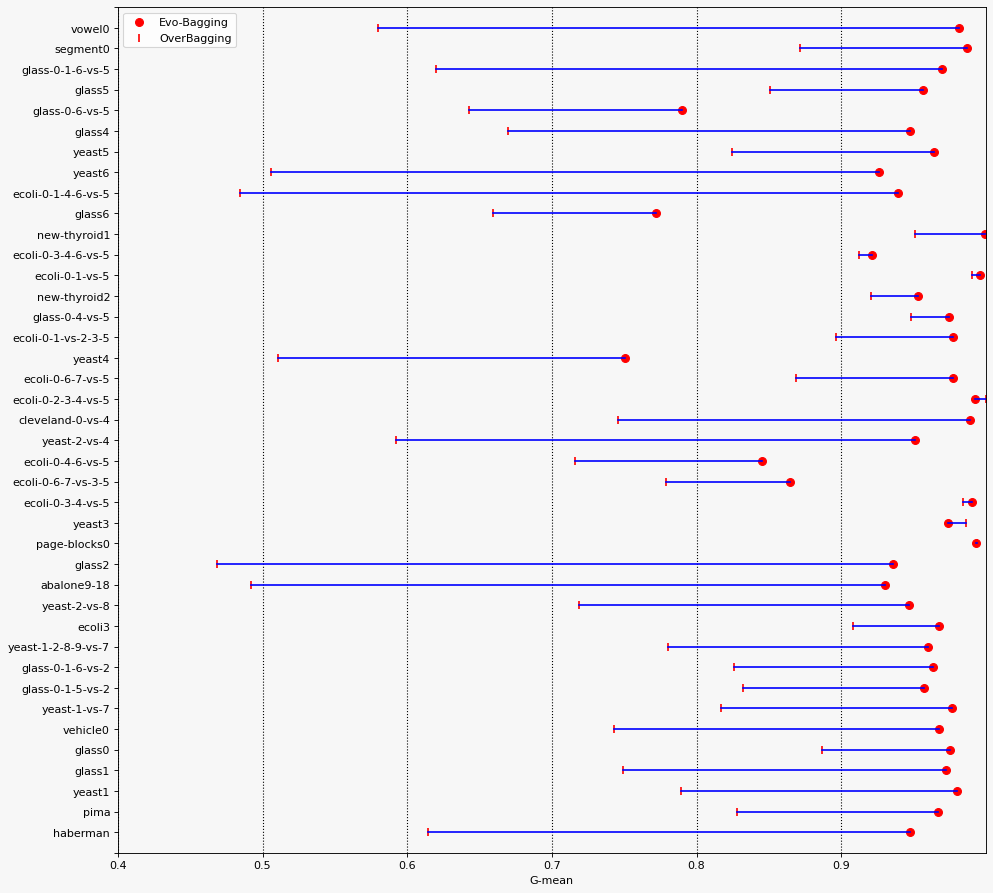

In [12]:
def newline(p1, p2, color='blue'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue')
    ax.add_line(l)
    return l

# 绘图板和轴
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# 垂直辅助线
ax.vlines(x=.4, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.5, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.6, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.7, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.8, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.9, ymin=-1, ymax=41, color='black', alpha=1, linewidth=1, linestyles='dotted')

# 散点作为顶点
type1 = ax.scatter(y=df['index'], x=df['mean_auc_bco'], s=50, color='red', alpha=1.0, marker='o')
type2 = ax.scatter(y=df['index'], x=df['mean_auc_ob'], s=50, color='red', alpha=1.0, marker='|')

# 分段线
for i, p1, p2 in zip(df['index'], df['mean_auc_bco'], df['mean_auc_ob']):
    newline([p1, i], [p2, i])

# 装饰
ax.set_facecolor('#f7f7f7')
# ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0.4,1.0), ylim=(-1, 40), xlabel='G-mean')
ax.set_xticks([.4, .5, 0.6, 0.7, .8, 0.9])
ax.set_yticks([-1,0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])
ax.set_xticklabels(['0.4', '0.5', '0.6','0.7', '0.8',  '0.9'])
ax.set_yticklabels(['']+df.dataset.tolist())
ax.legend((type1, type2), ('Evo-Bagging', 'OverBagging'), loc=2)
plt.show()